## Rotas de entrega - Caminhao


### Instalação e carregamento das bibliotecas de GA em python

In [ ]:
!pip install deap

     |████████████████████████████████| 163kB 8.6MB/s 


In [ ]:
import random
import numpy
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import math

### Declaração das funções auxiliares que devem conter as informações do problema

In [ ]:
# Função Objetivo -> Repare que o único parametro que a função deve receber é um individuo
def DespesaCaminhoes(individual):
  # Loja1Armazem1 = math.ceil(individual[0])
  # Loja2Armazem1 = math.ceil(individual[1])
  # Loja3Armazem1 = math.ceil(individual[2])
  # Loja1Armazem2 = math.ceil(individual[3])
  # Loja2Armazem2 = math.ceil(individual[4])
  # Loja3Armazem2 = math.ceil(individual[5])
  # Loja1Armazem3 = math.ceil(individual[6])
  # Loja2Armazem3 = math.ceil(individual[7])
  # Loja3Armazem3 = math.ceil(individual[8])
  matrizViagens = numpy.ceil(numpy.resize(individual, [3,3])/4)
  matrizCustos = [[500, 420, 360], [340, 380, 275], [190, 230, 250]]
  custo_total = numpy.sum(matrizViagens*matrizCustos)
  return custo_total,

In [ ]:
# Função de restrição que o problema tiver (nem todos os problemas contém restrições)
def FuncaoDeRestricao(individual):
  matrizPacotes = numpy.resize(individual, [3,3])
  armazenamentoMaximo = [430, 190, 120]
  demandaMinima = [230, 95, 190]
  armazenamentoAtingido = sum(matrizPacotes)
  demandaAtingida = sum(matrizPacotes, 2)
  if(numpy.less_equal(armazenamentoAtingido, armazenamentoMaximo).all() and numpy.greater_equal(demandaAtingida, demandaMinima).all()):
    return True
  return False

In [ ]:
# Função para cálculo da penalização da função objetivo para os casos em que o individuo não satisfaça as restrições
def Penalizacao(individual):
  matrizPacotes = numpy.resize(individual, [3,3])
  armazenamentoMaximo = [430, 190, 120]
  demandaMinima = [230, 95, 190]
  armazenamentoAtingido = sum(matrizPacotes)
  demandaAtingida = sum(matrizPacotes, 2)
  armazenamentoExcedente = 0
  demandaFaltante = 0
  if(not(numpy.less_equal(armazenamentoAtingido, armazenamentoMaximo).all())):
    armazenamentoExcedente = (numpy.sum(armazenamentoAtingido - armazenamentoMaximo))**2

  if(not(numpy.greater_equal(demandaAtingida, demandaMinima).all())):
    demandaFaltante = (numpy.sum(demandaMinima - demandaAtingida))**2

  return (armazenamentoExcedente + demandaFaltante)**2

In [ ]:
# Função utilizada para gerar os individuos -> Repare que não há nenhum mistério, os valores v1 e v2 utilizam a função que é passada por parâmetro que por sua vez
# é uma função que gera numeros aleatorios inteiros entre 0 e 50, como está declarado mais abaixo
# outro ponto importante é como fazer a declaração do cromossomo, procure sempre utilizar tal forma como está decrito, para cada valor, adicionar (append) o mesmo ao cromossomo
# GeradorDeIndividuos(ClasseDoIndividuo, FunçãoDeGeraçãoDeNºAleatorio):
def GeradorDeIndividuos(icls, random_function):
  i = 0
  cromossomo = list()
  for _ in range(150): 
  # while(1):
    a1l1 = random_function()
    a2l1 = random_function()
    a3l1 = random_function()
    a1l2 = random_function()
    a2l2 = random_function()
    a3l2 = random_function()
    a1l3 = random_function()
    a2l3 = random_function()
    a3l3 = random_function()
    if(FuncaoDeRestricao([a1l1, a2l1, a3l1, a1l2, a2l2, a3l2, a1l3, a2l3, a3l3])):
      break
    i = i + 1
  cromossomo.append(a1l1)
  cromossomo.append(a2l1)
  cromossomo.append(a3l1)
  cromossomo.append(a1l2)
  cromossomo.append(a2l2)
  cromossomo.append(a3l2)
  cromossomo.append(a1l3)
  cromossomo.append(a2l3)
  cromossomo.append(a3l3)
  return icls(cromossomo)

### Declaração dos pacotes referentes a biblioteca do GA: 
#### Nomenclatura referente a biblioteca e deve-se alterar somente os pesos das funções que deverão ser, ou maximizada ou minimizada
#### Pode-se alterar também o tipo da variavel do Individuo. Mas que, geralmente, é uma lista de numeros inteiros

In [ ]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [ ]:
toolbox = base.Toolbox()
# Definir o gerador de numeros aleatórios de numeros inteiros entre o intervalo (0 e 50)
toolbox.register("random_int", random.randint, 0, 300)
# Inicialização do cromossomo (quantos genes o cromossomo deve possuir)
toolbox.register("individual", GeradorDeIndividuos, creator.Individual, toolbox.random_int)
# Registro do individuo na população
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
# Registro do nome da função objetivo
toolbox.register("evaluate", DespesaCaminhoes)
# Registro da função de penalidade caso o individuo não obedeça as restrições
toolbox.decorate("evaluate", tools.DeltaPenalty(FuncaoDeRestricao, 0, Penalizacao)) 
# Registro de qual o tipo de cruzamento deve ser utilizado (cruzamento de 2 pontos)
toolbox.register("mate", tools.cxUniform, indpb=0.6)
# toolbox.register("mate", CrossoverFunction, icls=creator.Individual, attr_bool_function=toolbox.attr_bool)
# Registro de qual tipo de mutação deve ser utilizado (probabilidade de um individuo sofrer mutação)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.25)
# toolbox.register("mutate", MutationFunction, indpb=0.1)
# Registro de qual o tipo do método de seleção que será utilizado
toolbox.register("select", tools.selRoulette)

## Chamada efetiva do GA para resolução

In [ ]:
pop = toolbox.population(n=14)                           # inicialização da pop
hof = tools.HallOfFame(1)                                 # melhor indivíduo
stats = tools.Statistics(lambda ind: ind.fitness.values)  # estatísticas
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

In [ ]:
# Definindo sementes iniciais
ind1 = creator.Individual([80, 120, 110, 75, 90, 170, 42, 37, 12])
pop.append(ind1)

In [ ]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.3, ngen=80, stats=stats, halloffame=hof, verbose=True) #aumentei mut = 0.7

gen	nevals	avg        	std        	min        	max        
0  	15    	2.28354e+11	4.06691e+11	2.65689e+09	1.60751e+12
1  	13    	8.50097e+11	1.03215e+12	5.77201e+08	3.07292e+12
2  	6     	1.46051e+12	9.20052e+11	5.35279e+10	3.07292e+12
3  	15    	1.47555e+12	1.164e+12  	1.15743e+10	3.51248e+12
4  	14    	2.1858e+12 	1.27978e+12	3.49708e+11	5.07601e+12
5  	14    	1.96063e+12	1.32899e+12	2.27988e+11	5.07601e+12
6  	14    	2.13879e+12	1.45549e+12	4.24838e+10	5.07601e+12
7  	8     	2.29725e+12	1.42083e+12	4.29654e+10	5.07601e+12
8  	13    	2.04362e+12	1.66869e+12	1.64817e+10	5.07601e+12
9  	10    	3.59162e+12	1.41572e+12	5.35279e+10	5.07601e+12
10 	10    	3.94582e+12	1.28405e+12	3.91477e+11	5.07601e+12
11 	9     	2.87201e+12	2.07828e+12	8.99918e+09	5.57735e+12
12 	13    	2.80177e+12	1.92873e+12	1.47341e+09	5.57735e+12
13 	11    	2.72636e+12	2.04517e+12	1.21707e+10	5.57735e+12
14 	11    	2.96605e+12	1.89544e+12	1.53564e+10	5.57735e+12
15 	11    	3.41427e+12	2.01176e+12	1.49715e+09	5.57735e+

## Resultados

In [ ]:
# Melhor solução
print("Melhor Indivíduo:")
print(hof[0])

# Verificação da função de restrição
print(FuncaoDeRestricao(hof[0]))


# Melhor resultado da função objetivo
print("Melhor Resultado da Função Objetivo:")
DespesaCaminhoes(hof[0])

Melhor Indivíduo:
[0, 59, 0, 0, 24, 175, 243, 292, 102]
False
Melhor Resultado da Função Objetivo:


(55560.0,)

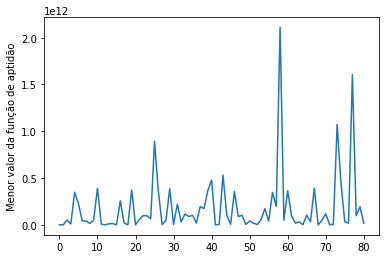

In [ ]:
import matplotlib.pyplot as plt
gen, minVal = log.select("gen", "min")
plt.plot(gen, minVal)
plt.ylabel('Menor valor da função de aptidão')
plt.show()

## Utilizando a forma alternativa de resolução do mesmo problema

In [ ]:
# definição da população inicial
population = toolbox.population(n=30)
# quantidade de gerações
NGEN=25
bestIndEachGeneration = []
bestInd = []
for gen in range(NGEN):
  print("Geracao: ", gen)
  offspring = algorithms.varAnd(population, toolbox, cxpb=0.5, mutpb=0.1)
  fits = list(toolbox.map(toolbox.evaluate, offspring))
  
  indexes = range(len(offspring))
  indexes = [x for _,x in sorted(zip(fits, indexes))]
  fits = [fits[x] for x in indexes]
  offspring = [offspring[x] for x in indexes]
  print(offspring)
  print(fits)
  for fit, ind in zip(fits, offspring):
    ind.fitness.wvalues = fit
  elites_ind = offspring[:max(1, round(0.15*len(offspring)))]
  population = toolbox.select(offspring, len(population)-len(elites_ind))
  population.extend(elites_ind)
  bestIndEachGeneration.append([offspring[fits.index(min(fits))], min(fits)])
  bestInd.append(min(bestIndEachGeneration, key=lambda t:t[1])[1])
  print(" Melhor Avaliação dessa geração: ", bestIndEachGeneration[-1][1], "\n", 
        "Melhor Avaliação Geral", min(bestIndEachGeneration, key=lambda t:t[1])[1], "\n",
        "Da geração: ", bestIndEachGeneration.index(min(bestIndEachGeneration, key=lambda t:t[1])), "\n",
        "Cromossomo: ", min(bestIndEachGeneration, key=lambda t:t[1])[0], "\n"
       )


Geracao:  0
[[25, 217, 141, 28, 57, 71, 121, 0, 89], [37, 25, 85, 165, 201, 155, 53, 97, 165], [237, 99, 123, 28, 108, 49, 216, 43, 147], [106, 102, 59, 155, 101, 83, 140, 82, 237], [162, 22, 10, 111, 46, 53, 155, 20, 280], [0, 0, 226, 0, 150, 0, 94, 233, 157], [206, 25, 49, 17, 285, 54, 95, 135, 26], [12, 192, 200, 288, 30, 130, 110, 5, 222], [216, 244, 25, 176, 108, 46, 110, 106, 228], [224, 222, 124, 0, 137, 47, 256, 225, 98], [248, 291, 7, 37, 31, 106, 253, 241, 128], [76, 150, 237, 155, 24, 85, 242, 134, 273], [22, 146, 296, 21, 153, 89, 298, 192, 212], [5, 62, 155, 22, 236, 198, 133, 218, 69], [243, 106, 248, 0, 56, 42, 287, 193, 255], [48, 109, 182, 285, 269, 232, 213, 68, 35], [257, 208, 84, 21, 87, 0, 161, 220, 69], [270, 23, 140, 40, 232, 65, 284, 295, 94], [51, 177, 169, 137, 251, 49, 183, 167, 259], [189, 278, 113, 2, 22, 110, 278, 242, 227], [185, 245, 42, 216, 286, 107, 37, 138, 223], [247, 156, 254, 116, 168, 273, 172, 62, 52], [38, 54, 226, 136, 167, 286, 21, 102, 120],

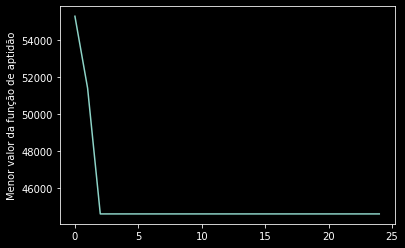

In [ ]:
from matplotlib import style
style.use('dark_background')
import matplotlib.pyplot as plt
plt.plot(bestInd)
plt.ylabel('Menor valor da função de aptidão')
plt.show()